# Projeto EDA | Estatística

* Anderson Miranda - ID: 1116003

* Curso: **Data Science - Santander Coders 2023 | 2º Semestre**
* **ADA Tech** em parceria com **Banco Santander**
* Módulo: **Estatística I**
* Facilitador: **Lucas Hermeto**

<h4><strong>Objetivo Geral:</strong></h4>

Este projeto tem por objetivo realizar uma Análise Exploratória de Dados em dados reais, utilizando os recursos da disciplica de Estatística I, do Curso Data Science - Santander Coders, fazendo uso da Estatística Descritiva para gerar valor e extrair insights significativos, para aplicação em negócios reais.

<h4><strong>Sobre o mercado financeiro</strong></4>

Segundo a Empiricus, o mercado financeiro é um ambiente onde diversos tipos de ativos com valor financeiro (títulos, moedas, ações, commodities, etc.) são negociados através de operações de compra e venda. Essa movimentação exerce influência direta na economia de um país.

No que se refere a estrutura, afirmam que cada país possui regras próprias para gerenciar seu mercado financeiro, com instituições específicas para emissão de moedas, controle das operações e intermediação das negociações.

São Participantes:

- Instituições financeiras: bancos, corretoras, etc.
- Instituições de pagamento: empresas que facilitam transações financeiras.
- Órgãos de governo: responsáveis pela regulamentação e fiscalização do mercado.
- Investidores: pessoas físicas ou jurídicas que aplicam recursos em produtos do mercado financeiro.
- Captadores: empresas ou governos que buscam recursos no mercado financeiro.

O mercado financeiro funciona como um grande balcão de negócios, onde investidores (credores) fornecem capital em troca de ativos, enquanto captadores (mutuários) captam recursos mediante pagamento de juros ou participação nos lucros.

Desse modo, tem-se o mercado financeiro como fundamental para o desenvolvimento de um país, pois facilita a captação de recursos para empresas e governos, além de estimular o crescimento da economia.

Em economias de livre mercado, o mercado financeiro é impulsionado pelas forças da oferta e da demanda, o que contribui para a eficiência na alocação de recursos e para o crescimento econômico.

Fonte: https://www.empiricus.com.br/explica/mercado-financeiro/

<h4><strong>Sobre os ciclos de mercado</strong></h4>

Segundo a Toro Investimentos, "ciclo de mercado" é um termo cunhado para fazer referência as tendências ou padrões que surgem durante diferentes mercados ou ambientes de negócios, como a Bolsa de Valores. Tal evento é importante uma vez que se o ciclo for de alta, a tendência é que o preço dos ativos negociados aumente com o tempo, mas se o período for de baixa, é possível que aconteça uma desvalorização na cotação dos ativos.

A toro afirma ainda que os movimentos gerais do mercado financeiro podem ser descritos como ciclos repetitivos, identificáveis em quatro estágios, sendo eles: acumulação, markup, distribuição e markdown.

Eles destacam, que é importante entender esses ciclos de mercado pode ajudar investidores e traders a tomarem decisões mais acertadas no longo prazo.

Fonte: https://blog.toroinvestimentos.com.br/trading/ciclos-de-mercado/


<h4><strong>Dos Dados:</strong></h4>

Este estudo será realizado com dados reais de dois ativos negociados no mercado B3 - Brasil.
Os dados foram extraídos do mercado de ações através da biblioteca Yahoo Finance, correspondente ao período de Janeiro de 2020 a Dezembro de 2023.

<h4><strong>Objetivos Específico:</strong></h4>

- Descrever estatisticamente os dados utilizados, aplicando o conhecimento da Estatística Descritiva;
- Analisar o comportamento do índice ao longo do período;
- Verificar se há correlação e em qual grau, entre a taxa de variação dos pregões diários;
- Verificar se a média da variação diária, no valor do fechamento, foi maior no período da pandemia pela COVID-19, ou após.

<h4><strong>Justificativa:</strong></h4>

Essas informações ajudam o investidor a compreender possíveis fenômenos que podem afetar, direto ou indiretamente, o mercado de investimento e o comportamento de ambos ativos. E, ainda, qual proposta está menos exposta e mais estável.

<h4><strong>Ferramentas:</strong></h4>

NumPy, Pandas, Matplotlib, Seaborn, Fundamentus e Yahoo finance

<h4><strong>Referências:</strong></h4>

- https://www.empiricus.com.br/explica/mercado-financeiro/
- https://blog.toroinvestimentos.com.br/trading/ciclos-de-mercado/
- https://matplotlib.org/stable/
- https://pandas.pydata.org
- https://seaborn.pydata.org/generated/seaborn.load_dataset.html


<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>SUMÁRIO</strong></h3>
</div>

1. Instalação e Carregamento Bibliotecas
2. Carregamento dos Dados
3. Análise Geral dos dados
4. Análise Univariada
5. Análise Multivariada
6. Teste de Hipótese
7. Análise Complementar
8. Probabilidade
9. Conclusão

<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>1. Instalação e Carregamento das Bibliotecas</strong></h3>
</div>

In [1]:
# Instalar bibliotecas necessárias para projeto
!pip install yfinance --quiet
!pip install fundamentus --quiet
print('Instalação concluida.')

Instalação concluida.


In [2]:
import numpy as np
import pandas as pd

from scipy.stats import norm, normaltest
from scipy import stats
import math
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import yfinance as yf
import fundamentus as fd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>2. Carregamento dos Dados</strong></h3>
</div>

In [3]:
# Definindo o ticker dos ativos
bovespa = '^BVSP'
santander = 'SANB3.SA'
bradesco = 'BBDC3.SA'

In [4]:
# Obter os dados do IBOV
df_ibov = yf.download(bovespa, start='2020-01-01', end='2023-12-31')
df_ibov.to_csv('bvsp.csv')

# Obter os dados do Santander
df_santander = yf.download(santander, start='2020-01-01', end='2023-12-31')
df_santander.to_csv('santander.csv')

# Obter os dados do Bradesco
df_bradesco = yf.download(bradesco, start='2020-01-01', end='2023-12-31')
df_bradesco.to_csv('bradesco.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Junção de dados unificados
df_geral = df_ibov.merge(df_santander, left_index=True, right_index=True, suffixes=('_ibov', '_san'))

In [6]:
# Obter unificado os dados do ativo do Santander e Bradesco
df = yf.download([santander, bradesco, bovespa], start='2020-01-01', end='2023-12-31')
display(df.head())

[*********************100%%**********************]  3 of 3 completed


Price       Adj Close                           Close                       \
Ticker       BBDC3.SA   SANB3.SA     ^BVSP   BBDC3.SA   SANB3.SA     ^BVSP   
Date                                                                         
2020-01-02  21.774921  18.706154  118573.0  26.626596  24.979830  118573.0   
2020-01-03  21.435144  19.031599  117707.0  26.198347  25.414425  117707.0   
2020-01-06  21.312191  18.408798  116878.0  26.048084  23.619354  116878.0   
2020-01-07  20.949511  18.335159  116662.0  25.604809  23.524876  116662.0   
2020-01-08  20.629858  18.047983  116247.0  25.214125  23.156414  116247.0   

Price            High                             Low                       \
Ticker       BBDC3.SA   SANB3.SA     ^BVSP   BBDC3.SA   SANB3.SA     ^BVSP   
Date                                                                         
2020-01-02  26.626596  25.225470  118573.0  25.657400  24.469650  115649.0   
2020-01-03  26.814425  25.414425  118792.0  26.115702  24.479097  117341.0   
2020-01-06  26.198347  24.327934  117707.0  25.507137  23.449293  116269.0   
2020-01-07  26.138241  24.072845  117076.0  25.514650  23.524876  115965.0   
2020-01-08  25.807663  23.836653  117335.0  25.101427  22.967461  115693.0   

Price            Open                        Volume                    
Ticker       BBDC3.SA   SANB3.SA     ^BVSP BBDC3.SA SANB3.SA    ^BVSP  
Date                                                                   
2020-01-02  25.800150  25.225470  115652.0  3753553   107221  5162700  
2020-01-03  26.250938  24.753082  118564.0  7374538   128072  6834500  
2020-01-06  25.965439  24.091742  117707.0  6448961    31330  6570000  
2020-01-07  26.048084  23.770517  116872.0  2289852    11219  4854100  
2020-01-08  25.604809  23.836653  116667.0  3265076    11325  5910500

<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>3. Análise Geral dos dados</strong></h3>
</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 993 entries, 2020-01-02 to 2023-12-28
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BBDC3.SA)  993 non-null    float64
 1   (Adj Close, SANB3.SA)  993 non-null    float64
 2   (Adj Close, ^BVSP)     993 non-null    float64
 3   (Close, BBDC3.SA)      993 non-null    float64
 4   (Close, SANB3.SA)      993 non-null    float64
 5   (Close, ^BVSP)         993 non-null    float64
 6   (High, BBDC3.SA)       993 non-null    float64
 7   (High, SANB3.SA)       993 non-null    float64
 8   (High, ^BVSP)          993 non-null    float64
 9   (Low, BBDC3.SA)        993 non-null    float64
 10  (Low, SANB3.SA)        993 non-null    float64
 11  (Low, ^BVSP)           993 non-null    float64
 12  (Open, BBDC3.SA)       993 non-null    float64
 13  (Open, SANB3.SA)       993 non-null    float64
 14  (Open, ^BVSP)          993 non-null    

**Nota**: Todos os dados do DataFrame são do tipo float, sendo classificados como quantitativos contínuos, exceto a feature volume, que está um valor inteiro, sendo classificado como valor quantitativo discreto.

Contudo, o index do DataFrame corresponde a data da operação, sendo uma variável do tipo datetime.

In [8]:
df.columns

MultiIndex([('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'SANB3.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close', 'BBDC3.SA'),
            (    'Close', 'SANB3.SA'),
            (    'Close',    '^BVSP'),
            (     'High', 'BBDC3.SA'),
            (     'High', 'SANB3.SA'),
            (     'High',    '^BVSP'),
            (      'Low', 'BBDC3.SA'),
            (      'Low', 'SANB3.SA'),
            (      'Low',    '^BVSP'),
            (     'Open', 'BBDC3.SA'),
            (     'Open', 'SANB3.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume', 'BBDC3.SA'),
            (   'Volume', 'SANB3.SA'),
            (   'Volume',    '^BVSP')],
           names=['Price', 'Ticker'])

O dados recebidos do yFincance são carregado em um DataFrame, permitindo um controle de forma tabular.

Descrição das features (variáveis) do nosso dataset::

| Feature | Descrição |
|---|---|
| Adj Close | Preço de fechamento do dia, com ajuste. |
| Close | Preço de fechamento do dia, sem ajuste. |
| High | Maior preço alcançado no dia, sem ajuste. |
| Low | Menor preço alcançado no dia, sem ajuste. |
| Open | Preço de abertura do dia, sem ajuste. |
| Volume | Volume negociado na operação do dia. |


In [9]:
df.shape

(993, 18)

A dimensão do nosso dataset é de 993 linhas e 12 colunas.

In [10]:
anos = df.index.year.value_counts().sort_index()
anos

Date
2020    248
2021    247
2022    250
2023    248
Name: count, dtype: int64

Analisando o período carregado, podemos verificar que foi carregado 4 anos, sendo eles: 2020, 2021, 2022 e 2023. Sendo 2020 e 2021, anos da pandemia pela COVID-19.

In [11]:
print("Média de dias operados, por ano:", anos.values.mean())
print("Desvio Padrão de dias de operações entres os anos:", np.std(anos.values))

Média de dias operados, por ano: 248.25
Desvio Padrão de dias de operações entres os anos: 1.0897247358851685


Pode-se aferir que existe uma média de 248,25 dias de operação por ano, com um desvio padrão muito baixo.

Apesar de cada ano possuir 365 dias, exceto os bisextos com 366 dias, essa quantidade ocorre uma vez que as operações de mercado acontecem em dias úteis, desconsiderando os finais de semana (sábado e domingo) e os feriados.

In [12]:
# Verificar a quantidade de dados ausentes.
df.isna().sum()

Price      Ticker  
Adj Close  BBDC3.SA    0
           SANB3.SA    0
           ^BVSP       0
Close      BBDC3.SA    0
           SANB3.SA    0
           ^BVSP       0
High       BBDC3.SA    0
           SANB3.SA    0
           ^BVSP       0
Low        BBDC3.SA    0
           SANB3.SA    0
           ^BVSP       0
Open       BBDC3.SA    0
           SANB3.SA    0
           ^BVSP       0
Volume     BBDC3.SA    0
           SANB3.SA    0
           ^BVSP       0
dtype: int64

In [13]:
print('Quantidade de registros com dados ausentes:', df.isna().sum().max()/df.shape[0] * 100, "%")

print(f'''
Pode-se verificar que exite ({df.isna().sum().max()}) linhas com dados nulos, o que poderia afetar a análise adiante,
considerando que é de interesse uma análise comporativa do desempenho dos ativos no mercado,
vamos precisa remover esses registros.
''')

# Limpar dados nulos ou ausentes, mantendo apenas os dados existentes em ambos os ativos.
if df.isna().sum().max() > 0:
    df_limpo = df.dropna()
    df_limpo.isna().sum()
else:
    df_limpo = df

# Nova dimensão do dataset
print("Dimensão de nossa base de dados.", df_limpo.shape)

Quantidade de registros com dados ausentes: 0.0 %

Pode-se verificar que exite (0) linhas com dados nulos, o que poderia afetar a análise adiante, 
considerando que é de interesse uma análise comporativa do desempenho dos ativos no mercado, 
vamos precisa remover esses registros.

Dimensão de nossa base de dados. (993, 18)


Após verificado e removido os dados nulos, podemos ver o dataset com registros válidos, mantendo apenas os dados úteis para a análise.

<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>4. Análise Univariada</strong></h3>
</div>

Tendo em vista que o interesse é sobre os os dados de Abertura (Open) e Fechamento (Close), para verificar a taxa de variação, vamos isolar as features de interesse, e ignorar as demais.

In [14]:
df_limpo.describe()[['Close','Open']]

Price        Close                                   Open              \
Ticker    BBDC3.SA    SANB3.SA          ^BVSP    BBDC3.SA    SANB3.SA   
count   993.000000  993.000000     993.000000  993.000000  993.000000   
mean     16.074582   15.212828  109837.437059   16.085626   15.248825   
std       2.810372    2.552146   11504.136640    2.815716    2.566378   
min      11.240000   10.316933   63570.000000   11.260000   10.383068   
25%      14.150000   13.292972  103775.000000   14.130000   13.310000   
50%      15.863636   14.460000  111593.000000   15.892561   14.500000   
75%      17.487602   17.110001  117518.000000   17.563637   17.110001   
max      26.626596   25.414425  134194.000000   26.250938   25.225470   

Price                  
Ticker          ^BVSP  
count      993.000000  
mean    109820.781470  
std      11480.052387  
min      63604.000000  
25%     103714.000000  
50%     111696.000000  
75%     117520.000000  
max     134194.000000

Pode-se verificar o Desvio Padrão muito baixo em torno das médias, o que aparenta uma possível distribuição normal. Contudo, é necessário verifica a distribuição dentro do gráfico.

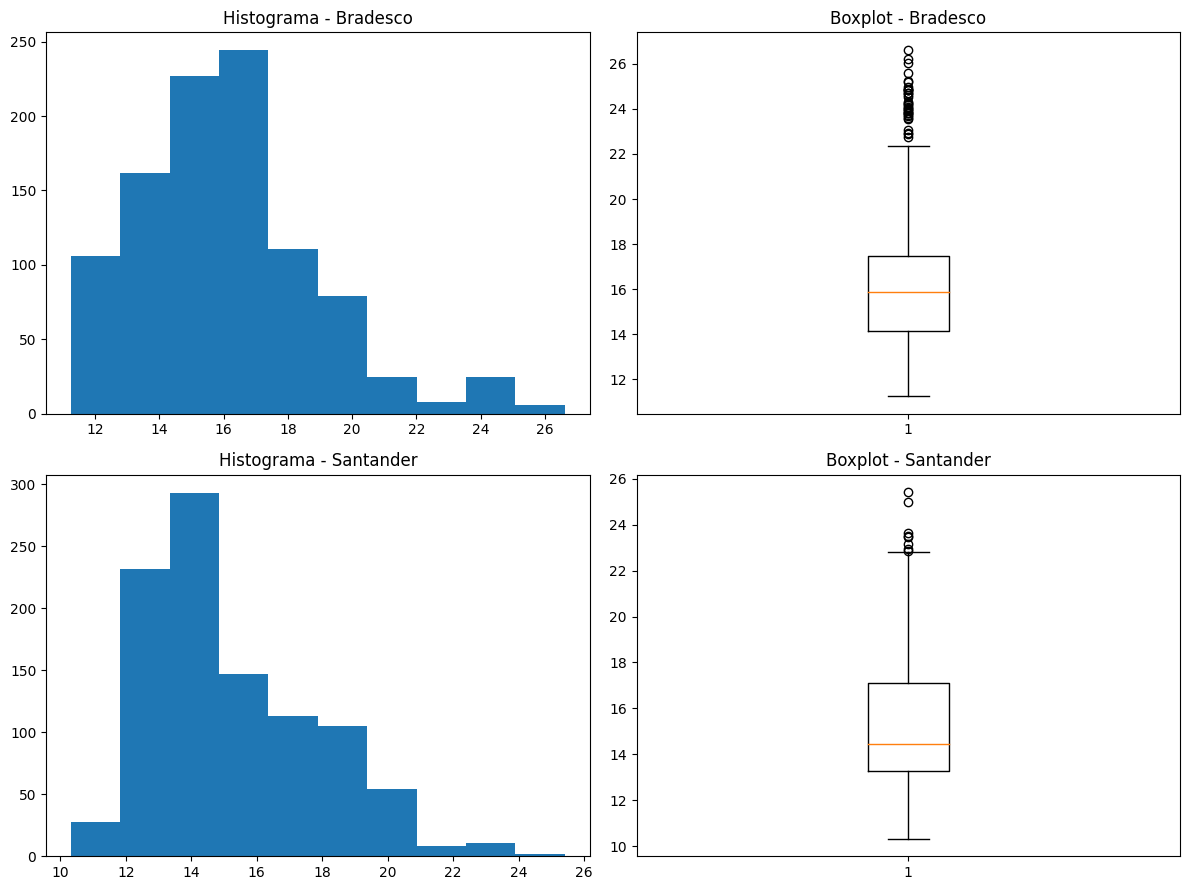

In [15]:
_df = df_limpo[['Close','Open']]
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

axs[0][0].hist(_df['Close'][bradesco])
axs[0][0].set_title('Histograma - Bradesco')

# Box Plot
axs[0][1].boxplot(_df['Close'][bradesco])
axs[0][1].set_title('Boxplot - Bradesco')

# Histograma
axs[1][0].hist(_df['Close'][santander])
axs[1][0].set_title('Histograma - Santander')

# Box Plot
axs[1][1].boxplot(_df['Close'][santander])
axs[1][1].set_title('Boxplot - Santander')

plt.tight_layout()
plt.show()

Pode-se observar que os dados não estão em uma Distribuição Normal, e com a presença de alguns possíveis outliers. Contudo, cabe destacar que são dados reais, de operações reais, não se tratando de erros ou valores discrepantes.

In [16]:
# Quantidade de operações por mês e ano
qtd = pd.crosstab(df_limpo.index.year, df_limpo.index.month)
qtd.index.name = "Ano"
qtd.columns.name = "Meses"
qtd

Meses,1,2,3,4,5,6,7,8,9,10,11,12
Ano,,,,,,,,,,,,
2020,22,18,22,20,20,21,23,21,21,21,19,20
2021,19,18,23,20,21,21,21,22,21,20,20,21
2022,21,19,22,19,22,21,21,23,21,20,20,21
2023,22,18,23,18,22,21,21,23,20,21,20,19


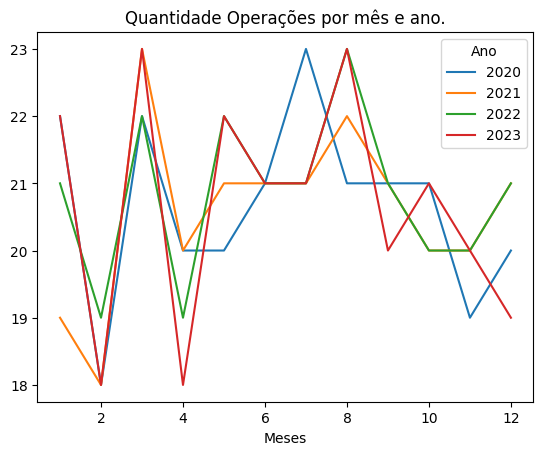

In [17]:
qtd.T.plot(title="Quantidade Operações por mês e ano.");

In [18]:
print('Média de operações realizadas por mês:', qtd.mean().mean())

Média de operações realizadas por mês: 20.6875


No quadro acima, verifica-se que forma realizadas mais aproximadamente 20.68 operações por mês.

<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>5. Análise Multivariada</strong></h3>
</div>

Nesse momento, tendo em vista a variável que desejamos avaliar, faremos uma análise da correlação entre os valores de fechamento de ambos os ativos.

In [19]:
df_limpo['Close'].columns

Index(['BBDC3.SA', 'SANB3.SA', '^BVSP'], dtype='object', name='Ticker')

In [20]:
# Análide do fechamento
_df_temp = df_limpo['Close']
_df_temp.columns = ['Bradesco', 'Santander', 'Bovespa']
corr = _df_temp.corr(method='pearson').round(2)
corr

,Bradesco,Santander,Bovespa
Bradesco,1.00,0.89,0.35
Santander,0.89,1.00,0.56
Bovespa,0.35,0.56,1.00


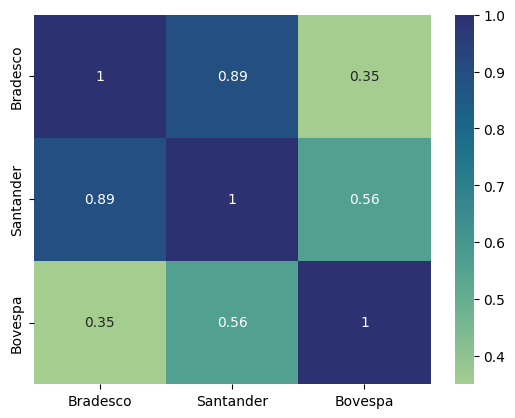

In [21]:
sns.heatmap(corr, annot=True, cmap="crest");

O gráfico acima, mostra a correlação de forma gráfica, onde quanto mais escuro o quadro, maior é a correlação entre as variáveis.

---
Quanto ao Coeficiente de correlação, considerando que:
- 0.9 para mais ou para menos indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.


Pode-se observar que **existe uma CORRELAÇÃO MODERADA entre as ações**:
- Santander com Bradesco: CORRELAÇÃO FORTE (justificada pelo mesmo seguimento);
- Santander com Bovespa: CORRELAÇÃO MODERADA.

---
Abaixo podemos ilustrar o comportamento das variáveis em um gráfico de dispersão, e o grau relacionado:

<br>
<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>
<br>

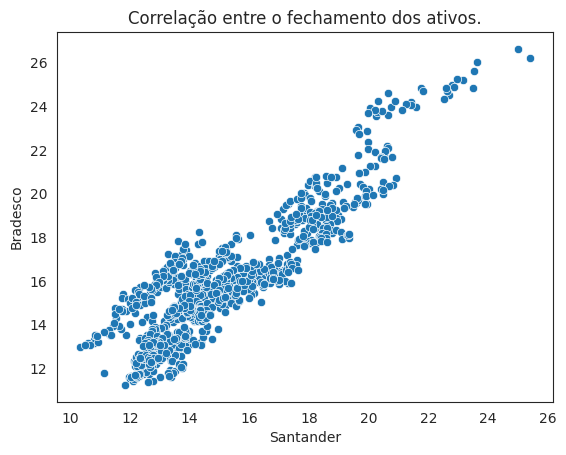

In [22]:
# Gráfico de Disperão entre o fechamento dos ativos.
sns.set_style("white")
g = sns.scatterplot(x=df_limpo['Close'][santander], y=df_limpo['Close'][bradesco])
g.set_title("Correlação entre o fechamento dos ativos.")
g.set_xlabel("Santander")
g.set_ylabel("Bradesco")
plt.show()

Acima podemos verificar uma CORRELAÇÃO POSITIVA FORTE entre as variáveis de fechamento, Santander e Bradesco.

Desse modo, considerando que ambos os ativos estão bem relacionados ao mesmo seguimento e que possuem uma correlação elevada, podemos sugerir que ambos são impactados pelas mesmas causas, simultaneamente.

<div style="background-color: #f5f5f5; color: #333333; padding: 5px 30px; border-radius: 5px;">
    <h4><strong>Insight:</strong> Considerando o grau de correlação, e que estão ligados ao mesmo seguimento de mercado, não é recomendado o investimento simultaneo em ambos os ativos. Recomendando-se a diversificação da carteira de investimentos em diferentes seguimentos, como forma de proteção e redução de risco.</h4>
</div>

<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>6. Teste de Hipótese</strong></h3>
</div>

Haja visto a inserção dos ativos no mesmo seguimento, e o elevado grau de correlação, buscaremos, agora, escolher o investimento menos arriscado, com menor variação e com maior tendência de crescimento.

Não sendo possível verificar, nesta análise, a tendência de cada ativo, podemos avaliar a variação.

In [23]:
df_limpo['variacao_SAN'] = df_limpo['Close'][santander] - df_limpo['Open'][santander]
df_limpo['variacao_BRA'] = df_limpo['Close'][bradesco] - df_limpo['Open'][bradesco]
df_limpo['variacao_IBOV'] = df_limpo['Close'][bovespa] - df_limpo['Open'][bovespa]
df_limpo[['Close', 'Open', 'variacao_SAN', 'variacao_BRA', 'variacao_IBOV']]

Price           Close                            Open                       \
Ticker       BBDC3.SA   SANB3.SA     ^BVSP   BBDC3.SA   SANB3.SA     ^BVSP   
Date                                                                         
2020-01-02  26.626596  24.979830  118573.0  25.800150  25.225470  115652.0   
2020-01-03  26.198347  25.414425  117707.0  26.250938  24.753082  118564.0   
2020-01-06  26.048084  23.619354  116878.0  25.965439  24.091742  117707.0   
2020-01-07  25.604809  23.524876  116662.0  26.048084  23.770517  116872.0   
2020-01-08  25.214125  23.156414  116247.0  25.604809  23.836653  116667.0   
...               ...        ...       ...        ...        ...       ...   
2023-12-21  15.460000  14.900000  132182.0  15.580000  14.910000  130826.0   
2023-12-22  15.050000  14.960000  132753.0  14.920000  14.930000  132553.0   
2023-12-26  15.110000  14.980000  133533.0  15.050000  14.960000  132753.0   
2023-12-27  15.220000  15.110000  134194.0  15.080000  14.980000  133523.0   
2023-12-28  15.280000  15.200000  134185.0  15.240000  15.110000  134194.0   

Price      variacao_SAN variacao_BRA variacao_IBOV  
Ticker                                              
Date                                                
2020-01-02    -0.245640     0.826447        2921.0  
2020-01-03     0.661343    -0.052591        -857.0  
2020-01-06    -0.472387     0.082645        -829.0  
2020-01-07    -0.245642    -0.443275        -210.0  
2020-01-08    -0.680239    -0.390684        -420.0  
...                 ...          ...           ...  
2023-12-21    -0.010000    -0.120000        1356.0  
2023-12-22     0.030000     0.130000         200.0  
2023-12-26     0.020000     0.059999         780.0  
2023-12-27     0.130000     0.140000         671.0  
2023-12-28     0.090000     0.040000          -9.0  

[993 rows x 9 columns]

In [24]:
df_limpo[['Close', 'variacao_SAN', 'variacao_BRA', 'variacao_IBOV']].describe(percentiles=[.01, 0.05, 0.25, 0.5, 0.75, 0.8, 0.99])

Price        Close                            variacao_SAN variacao_BRA  \
Ticker    BBDC3.SA    SANB3.SA          ^BVSP                             
count   993.000000  993.000000     993.000000   993.000000   993.000000   
mean     16.074582   15.212828  109837.437059    -0.035997    -0.011044   
std       2.810372    2.552146   11504.136640     0.328148     0.289205   
min      11.240000   10.316933   63570.000000    -1.993472    -1.389999   
1%       11.617600   11.138887   72985.040000    -0.897535    -0.780225   
5%       12.256000   12.184552   85349.800000    -0.557417    -0.462811   
25%      14.150000   13.292972  103775.000000    -0.217299    -0.170000   
50%      15.863636   14.460000  111593.000000    -0.020000     0.000000   
75%      17.487602   17.110001  117518.000000     0.150000     0.145454   
80%      18.304131   17.655939  118567.000000     0.188955     0.190001   
99%      24.830954   22.622428  130253.440000     0.754686     0.761322   
max      26.626596   25.414425  134194.000000     1.180000     1.284748   

Price  variacao_IBOV  
Ticker                
count     993.000000  
mean       16.655589  
std      1708.020956  
min    -12520.000000  
1%      -4345.360000  
5%      -2513.200000  
25%      -904.000000  
50%        43.000000  
75%      1061.000000  
80%      1282.600000  
99%      3441.080000  
max     10057.000000

In [25]:
print(f'Valor máximo e mínimo do Santander: {df_limpo["Close"][santander].min()} - {df_limpo["Close"][santander].max()}')
print(f'Valor máximo e mínimo do Bradesco: {df_limpo["Close"][bradesco].min()} - {df_limpo["Close"][bradesco].max()}')
print(f'Valor máximo e mínimo do Bovespa: {df_limpo["Close"][bovespa].min()} - {df_limpo["Close"][bovespa].max()}')

Valor máximo e mínimo do Santander: 10.316932678222656 - 25.414424896240234
Valor máximo e mínimo do Bradesco: 11.239999771118164 - 26.626596450805664
Valor máximo e mínimo do Bovespa: 63570.0 - 134194.0


Visualizando a tabela acima, percebemos que as médias são muito diferentes, entre Bovespa e Bancos, bem como as demais medidas, isso se dá em face da diferença de valor de cada ativo, como podemos observar na tabela abaixo.

Onde o ativo do Santander, como exemplo, vai variar entre (máximo - mínimo) R\$ 10,31 e R\$ 25,41, enquanto o Bovespa varia entre R\$ 63.570,00 e R\$ 134.194,00, estando em escalas diferentes.

Para evitar indução a erro, vamos analisar a diferença pela taxa de variação.

In [26]:
df_limpo['taxa_SAN'] = ((df_limpo['Close'][santander] - df_limpo['Open'][santander])/df_limpo['Open'][santander])*100
df_limpo['taxa_BRA'] = ((df_limpo['Close'][bradesco] - df_limpo['Open'][bradesco])/df_limpo['Open'][bradesco])*100
df_limpo['taxa_IBOV'] = ((df_limpo['Close'][bovespa] - df_limpo['Open'][bovespa])/df_limpo['Open'][bovespa])*100
df_limpo[['Close', 'Open', 'taxa_SAN', 'taxa_BRA', 'taxa_IBOV']].head()

Price           Close                            Open                       \
Ticker       BBDC3.SA   SANB3.SA     ^BVSP   BBDC3.SA   SANB3.SA     ^BVSP   
Date                                                                         
2020-01-02  26.626596  24.979830  118573.0  25.800150  25.225470  115652.0   
2020-01-03  26.198347  25.414425  117707.0  26.250938  24.753082  118564.0   
2020-01-06  26.048084  23.619354  116878.0  25.965439  24.091742  117707.0   
2020-01-07  25.604809  23.524876  116662.0  26.048084  23.770517  116872.0   
2020-01-08  25.214125  23.156414  116247.0  25.604809  23.836653  116667.0   

Price       taxa_SAN  taxa_BRA taxa_IBOV  
Ticker                                    
Date                                      
2020-01-02 -0.973777  3.203263  2.525680  
2020-01-03  2.671759 -0.200341 -0.722816  
2020-01-06 -1.960785  0.318290 -0.704291  
2020-01-07 -1.033388 -1.701758 -0.179684  
2020-01-08 -2.853751 -1.525823 -0.359999

In [27]:
df_limpo[['taxa_SAN', 'taxa_IBOV', 'taxa_BRA']].describe()

Price,taxa_SAN,taxa_IBOV,taxa_BRA
Ticker,,,
count,993.000000,993.000000,993.000000
mean,-0.208399,0.028872,-0.050979
std,2.152752,1.761513,1.803582
min,-12.411757,-14.711585,-9.481578
25%,-1.423491,-0.788934,-1.061780
50%,-0.123842,0.043769,0.000000
75%,1.005656,0.926552,0.932833
max,8.793764,13.848611,9.715908


Uma vez que estamos utilizado a mesma escala na análise, podemos verificar que as médias são muito similares, induzindo a afirmar que:

**"as médias da taxa de variação são iguais entre os ativos"**.

Vamos verificar o intervalo de confiança para as nossas médias.

<h3>Intervalo de Confiança para a média das taxas dos bancos<h3>

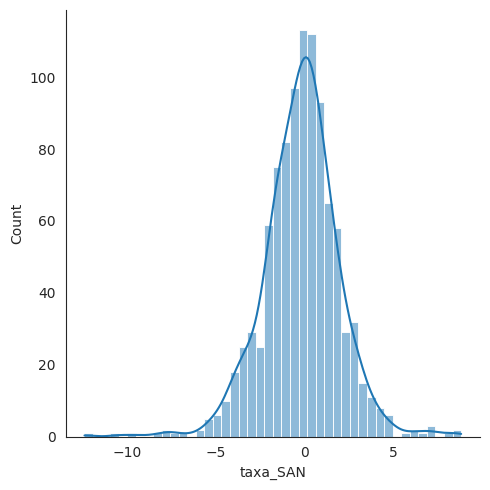

In [28]:
# Distribuição das taxas
sns.displot(df_limpo['taxa_SAN'], kde=True);

In [29]:
# Cálculo manual - Nível de Confiança de 95%
san = df_limpo['taxa_SAN']

n = len(san)                    # Quantidade
media = np.mean(san)            # Média
desvio_padrao = np.std(san)     # Desvio Padrão
alpha = 0.05 / 2                 # Confiabilidade de 95%

z = norm.ppf(1-alpha)

# Cálculo
x_inferior = media - z * (desvio_padrao / math.sqrt(n))
x_superior = media + z * (desvio_padrao / math.sqrt(n))

margem_erro = abs(media - x_superior)

print("Assim, podemos afirma, com intervalo de confiança de 95%, de que a taxa média de variação do ativo Santander,")
print("está no intervalo entre:", x_inferior, 'e', x_superior)
print("Média:", np.mean(san))
print("Margem de erro de:", margem_erro)

Assim, podemos afirma, com intervalo de confiança de 95%, de que a taxa média de variação do ativo Santander,
está no intervalo entre: -0.34222763681372936 e -0.07457062432459655
Média: -0.20839913056916295
Margem de erro de: 0.1338285062445664


In [30]:
# Cálculo Scipy - Nível de Confiança de 95%
san = df_limpo['taxa_SAN']

dp_n = stats.sem(san)           # Desvio Padrão / math.sqrt(n-1)

intervalos = norm.interval(0.95, media, stats.sem(san))

margem_erro = abs(media - intervalos[0])

print("Assim, podemos afirma, com intervalo de confiança de 95%, de que a taxa média de variação do ativo Santander,")
print("está no intervalo entre:", intervalos[0], 'e', intervalos[1])
print("Média:", np.mean(san))
print("Margem de erro de:", margem_erro)

Assim, podemos afirma, com intervalo de confiança de 95%, de que a taxa média de variação do ativo Santander,
está no intervalo entre: -0.3422950737070213 e -0.0745031874313046
Média: -0.20839913056916295
Margem de erro de: 0.13389594313785833


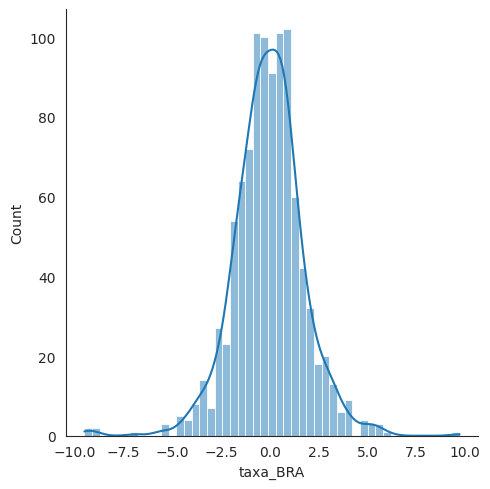

In [31]:
# Distribuição das taxas
sns.displot(df_limpo['taxa_BRA'], kde=True);

In [32]:
# Cálculo Scipy - Nível de Confiança de 95%
bra = df_limpo['taxa_BRA']

dp_n = stats.sem(bra)           # Desvio Padrão / math.sqrt(n-1)

intervalos = norm.interval(0.95, media, stats.sem(bra))

margem_erro = abs(media - intervalos[0])

print("Assim, podemos afirma, com intervalo de confiança de 95%, de que a taxa média de variação do ativo Bovespa,")
print("está no intervalo entre:", intervalos[0], 'e', intervalos[1])
print("Média:", np.mean(bra))
print("Margem de erro de:", margem_erro)

Assim, podemos afirma, com intervalo de confiança de 95%, de que a taxa média de variação do ativo Bovespa,
está no intervalo entre: -0.32057753700057584 e -0.09622072413775005
Média: -0.050978962541644364
Margem de erro de: 0.11217840643141289


Acima foi possível conhecermos o intervalo de confiança para as média nos dois ativos.

In [33]:
print("Média de taxa de variação Santander:", abs(np.mean(san)))
print("Média de taxa de variação Bradesco:", abs(np.mean(bra)))

Média de taxa de variação Santander: 0.20839913056916295
Média de taxa de variação Bradesco: 0.050978962541644364


Pode-se observar, pelas médias que a taxa de variação do Santander é maior, sendo possível afirmar que o ativo do Santander varia mais que os demais ativos :


        sendo o ativo de melhor escolha o de menor variação.


Entretanto, precisamos testar se essa nossa hipótese está correta.

        H0: media_santander = -0.2083
        H1: media_santander != -0.2083

Iremos testar a hipótese, e para isso utilizaremos a biblioteca SciPy. A partir dela vamos criar uma função que se adapta aos dados para atender as diversas distribuições e realizar o teste de hipótese.

O t-test exige que as distribuições sejam normais e variância igual, desse modo, vamos usar algumas funções para testar se os grupos tem essas características.

In [34]:
# Shapiro Wilk - testar normalidade dos dados
def normalidade(amostra, alpha = 0.05):
    statistic, pvalue = stats.shapiro(amostra)
    if statistic < alpha:
        return f"Não - statistic < alpha: {statistic}"
    if pvalue < alpha:
        return f"Não - pvalue < alpha: {pvalue}"
    return "Sim"

print("Amostra do Santander é normal?", normalidade(df_limpo['taxa_SAN'], 0.05))
print("Amostra do Bradesco é normal?", normalidade(df_limpo['taxa_BRA'], 0.05))
print("Amostra do Bovespa é normal?", normalidade(df_limpo['taxa_IBOV'], 0.05))

# Igualdade de Variancia variance test
def var_igualdade(amostra1, amostra2, alpha = 0.05):
    _, pvalue = stats.levene(amostra1, amostra2)
    if pvalue < alpha:
        return f"Não - pvalue < alpha: {pvalue}"
    return "Sim"

print("Igualdade de variância - Santander e Bradesco?", var_igualdade(df_limpo['taxa_SAN'], df_limpo['taxa_BRA']))

Amostra do Santander é normal? Não - pvalue < alpha: 8.515647090473824e-14
Amostra do Bradesco é normal? Não - pvalue < alpha: 4.523861093266553e-15
Amostra do Bovespa é normal? Não - pvalue < alpha: 1.1230606071597912e-29
Igualdade de variância - Santander e Bradesco? Não - pvalue < alpha: 3.1327084126819775e-05


Se ambas as amostras fosse normais e as variancias fossem iguais, utilizariamos:

    ttest_ind(amostra_a, amostra_b)

Se ambas as amostras fosse normais e as variancias fossem diferentes, utilizariamos ttest_ind() com parametro equal_var=False:

    ttest_ind(amostra_a, amostra_b, equal_var = False)

Como ambas as amostras não são normais, faremos uso do Mann Whitney U-Test, assim utilizaremos:

    mannwhitneyu(amostra_a, amostra_b)



<h3>Teste de Hipótese Z<h3>

Primeiro, vamos realizar um teste de hipótese para verificar se há diferença estatisticamente relevante entre a amostra e população do Santander. Nível de Confiança de 95%.

    H0 - NÃO HÁ diferença entre amostra e população.
    HA - EXISTE diferença entre amostra e população.

In [35]:
# Captando dados do santander dos útlimos 23 anos, e trantando como população
df_san_u = yf.download(santander, start='2000-01-01', end='2023-12-31')
san_pop = ((df_san_u['Close'] - df_san_u['Open']) / df_san_u['Open']) * 100

[*********************100%%**********************]  1 of 1 completed


In [36]:
from scipy.stats import mannwhitneyu, ttest_ind

# Teste de Hipótese - AMOSTRA E POPULAÇÃO
analise = mannwhitneyu(df_limpo['taxa_SAN'], san_pop)
print("p-value:", analise.pvalue)

if analise.pvalue <= 0.05:
  print('Rejeitamos H0, ou seja, aceitamos HA e afirmamos que há diferença entre a população e a amostra.')
else:
  print('Aceitamos H0, ou seja, NÃO HÁ DIFERENÇA entre a população e a amostra.')

p-value: 4.418640401840333e-08
Rejeitamos H0, ou seja, aceitamos HA e afirmamos que há diferença entre a população e a amostra.


In [37]:
print("Média da População:", np.mean(san_pop))

Média da População: 0.4723069151159859


Segundo, vamos realizar um teste de hipótese para verificar se há diferença estatisticamente relevante entre mas médias das amostras do Santander e do Bradesco. Nível de Confiança de 95%.

    H0 - NÃO HÁ diferença entre as amostras.
    HA - EXISTE diferença entre as amostras.

In [38]:
# Teste de Hipótese - ENTRE AMOSTRAS
analise_2 = mannwhitneyu(df_limpo['taxa_SAN'], df_limpo['taxa_BRA'])
print("p-value:", analise_2.pvalue)

if analise_2.pvalue <= 0.05:
  print('Rejeitamos H0, ou seja, aceitamos HA e afirmamos que HÁ DIFERENÇA entre as médias de taxa das amostras.')
else:
  print('Aceitamos H0, ou seja, NÃO HÁ DIFERENÇA entre as médias de taxa das amostras.')

p-value: 0.10069808857997807
Aceitamos H0, ou seja, NÃO HÁ DIFERENÇA entre as médias de taxa das amostras.


In [39]:
print("Média das taxas de variação do Santander:", np.mean(df_limpo['taxa_SAN']))
print("Média das taxas de variação do Bradesco:", np.mean(df_limpo['taxa_BRA']))

Média das taxas de variação do Santander: -0.20839913056916295
Média das taxas de variação do Bradesco: -0.050978962541644364


Observamos que NÃO HÁ DIFERENÇA significativa entre as médias das taxas da variação, referentes aos últimos 04 anos, dos ativos, sendo, em primeira analise, investimentos de mesmo nível. Considerando, ainda, que o período analisado corresponde ao período de pandemia.

Desse modo, para realizar uma escolha de investimento, devemos buscar outros pontos para analise, onde existam diferenças significativas, exemplo do ROI (Retorno sobre o investimento), onde calculariamos o valor monetário de um investimento em relação ao custo; ou, poderiamos analisar a valorização do ativo.

Vamos ver qual a maior e melhor valorização entre os ativos, dentro do periodo escolhido.

<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>7. Analise Complementar</strong></h3>
</div>

In [40]:
df_limpo.head()

Price       Adj Close                           Close                       \
Ticker       BBDC3.SA   SANB3.SA     ^BVSP   BBDC3.SA   SANB3.SA     ^BVSP   
Date                                                                         
2020-01-02  21.774921  18.706154  118573.0  26.626596  24.979830  118573.0   
2020-01-03  21.435144  19.031599  117707.0  26.198347  25.414425  117707.0   
2020-01-06  21.312191  18.408798  116878.0  26.048084  23.619354  116878.0   
2020-01-07  20.949511  18.335159  116662.0  25.604809  23.524876  116662.0   
2020-01-08  20.629858  18.047983  116247.0  25.214125  23.156414  116247.0   

Price            High                             Low  ...      Open   Volume  \
Ticker       BBDC3.SA   SANB3.SA     ^BVSP   BBDC3.SA  ...     ^BVSP BBDC3.SA   
Date                                                   ...                      
2020-01-02  26.626596  25.225470  118573.0  25.657400  ...  115652.0  3753553   
2020-01-03  26.814425  25.414425  118792.0  26.115702  ...  118564.0  7374538   
2020-01-06  26.198347  24.327934  117707.0  25.507137  ...  117707.0  6448961   
2020-01-07  26.138241  24.072845  117076.0  25.514650  ...  116872.0  2289852   
2020-01-08  25.807663  23.836653  117335.0  25.101427  ...  116667.0  3265076   

Price                        variacao_SAN variacao_BRA variacao_IBOV  \
Ticker     SANB3.SA    ^BVSP                                           
Date                                                                   
2020-01-02   107221  5162700    -0.245640     0.826447        2921.0   
2020-01-03   128072  6834500     0.661343    -0.052591        -857.0   
2020-01-06    31330  6570000    -0.472387     0.082645        -829.0   
2020-01-07    11219  4854100    -0.245642    -0.443275        -210.0   
2020-01-08    11325  5910500    -0.680239    -0.390684        -420.0   

Price       taxa_SAN  taxa_BRA taxa_IBOV  
Ticker                                    
Date                                      
2020-01-02 -0.973777  3.203263  2.525680  
2020-01-03  2.671759 -0.200341 -0.722816  
2020-01-06 -1.960785  0.318290 -0.704291  
2020-01-07 -1.033388 -1.701758 -0.179684  
2020-01-08 -2.853751 -1.525823 -0.359999  

[5 rows x 24 columns]

In [41]:
# Buscando das datas
menor_data = df_limpo.index.min()
maior_data = df_limpo.index.max()

# Analisando o ativo do Santander
valor_a = df_limpo[df_limpo.index == menor_data][('Close', santander)].values[0]
valor_b = df_limpo[df_limpo.index == maior_data][('Close', santander)].values[0]
print('-'*80)
print(f'{"  SANTANDER  ":-^80}')
print('-'*80)
print(f"Quando valor R$ do ativo em {menor_data}: ", valor_a)
print(f"Quando valor R$ do ativo em {maior_data}: ", valor_b)
print(f"Média do valor do ativo no período: ", df_limpo[('Close', santander)].mean())
print(f"Mediana do ativo no período: ", np.median(df_limpo[('Close', santander)]))
print(f"Menor e Maior taxa de variação no período: {df_limpo['taxa_SAN'].min().round(2)}% e {df_limpo['taxa_SAN'].max().round(2)}%")
print()
print(f"Qual valor da variação que teriamos sofrido em 04 anos: R$ ", valor_b - valor_a)
print(f"Uma taxa de", (valor_b - valor_a) * 100 / valor_a, "%")
print("")

# Analisando o ativo do Bradesco
valor_a = df_limpo[df_limpo.index == menor_data][('Close', bradesco)].values[0]
valor_b = df_limpo[df_limpo.index == maior_data][('Close', bradesco)].values[0]
print('-'*80)
print(f'{"  BRADESCO  ":-^80}')
print('-'*80)
print(f"Quando valor R$ do ativo em {menor_data}: ", valor_a)
print(f"Quando valor R$ do ativo em {maior_data}: ", valor_b)
print(f"Média do valor do ativo no período: ", df_limpo[('Close', bradesco)].mean())
print(f"Mediana do ativo no período: ", np.median(df_limpo[('Close', bradesco)]))
print(f"Menor e Maior taxa de variação no período: {df_limpo['taxa_BRA'].min().round(2)}% e {df_limpo['taxa_BRA'].max().round(2)}%")
print()
print(f"Qual valor da variação que teriamos sofrido em 04 anos: R$ ", valor_b - valor_a)
print(f"Uma taxa de", (valor_b - valor_a) * 100 / valor_a, "%")
print('-'*80)

--------------------------------------------------------------------------------
---------------------------------  SANTANDER  ----------------------------------
--------------------------------------------------------------------------------
Quando valor R$ do ativo em 2020-01-02 00:00:00:  24.979829788208008
Quando valor R$ do ativo em 2023-12-28 00:00:00:  15.199999809265137
Média do valor do ativo no período:  15.212827750683312
Mediana do ativo no período:  14.460000038146973
Menor e Maior taxa de variação no período: -12.41% e 8.79%

Qual valor da variação que teriamos sofrido em 04 anos: R$  -9.779829978942871
Uma taxa de -39.15090719937388 %

--------------------------------------------------------------------------------
----------------------------------  BRADESCO  ----------------------------------
--------------------------------------------------------------------------------
Quando valor R$ do ativo em 2020-01-02 00:00:00:  26.626596450805664
Quando valor R$ do ativo em 2

Pensando na valorização do ativo, podemos concluir que o ativo do SANTANDER teria sido o investimento com maior valorização, sendo um possibilidade interessante de investimento.

Entretanto, existe uma máximo no mercado financeiro que deve ser lembrada sempre que analisamos um investimento:

<div style="padding: 20px;">
<h2>Retornos passados não são garantias de lucros futuros.</h2>
</div>

In [42]:
# Ativos
santander, bradesco

('SANB3.SA', 'BBDC3.SA')

In [43]:
df_fun_san = fd.get_papel("SANB3")
df_fun_bra = fd.get_papel("BBDC3")
df_fun = pd.concat([df_fun_san, df_fun_bra])

In [44]:
df_fun_san.columns

Index(['Papel', 'Tipo', 'Empresa', 'Setor', 'Subsetor', 'Cotacao',
       'Data_ult_cot', 'Min_52_sem', 'Max_52_sem', 'Vol_med_2m',
       'Valor_de_mercado', 'Valor_da_firma', 'Ult_balanco_processado',
       'Nro_Acoes', 'PL', 'PVP', 'PEBIT', 'PSR', 'PAtivos', 'PCap_Giro',
       'PAtiv_Circ_Liq', 'Div_Yield', 'EV_EBITDA', 'EV_EBIT', 'Cres_Rec_5a',
       'LPA', 'VPA', 'Marg_Bruta', 'Marg_EBIT', 'Marg_Liquida', 'EBIT_Ativo',
       'ROIC', 'ROE', 'Liquidez_Corr', 'Div_Br_Patrim', 'Giro_Ativos', 'Ativo',
       'Cart_de_Credito', 'Depositos', 'Patrim_Liq', 'Result_Int_Financ_12m',
       'Rec_Servicos_12m', 'Lucro_Liquido_12m', 'Result_Int_Financ_3m',
       'Rec_Servicos_3m', 'Lucro_Liquido_3m'],
      dtype='object')

In [45]:
df_fun[['Cotacao', 'ROE']]

,Cotacao,ROE
SANB3,13.30,10.3%
BBDC3,12.96,9.4%


Considerações, com base na situação atual das empresas:
- Pela cotação, o SANTANDER está mais valorizado;
- Pelo ROE (Retorno sobre o Patrimônio Líquido), podemos observar o nível de eficiência na aplicação dos recursos para geração de valor e lucro, o SANTANDER se mostrou mais eficiente;


<h3>Calculando Outliers</h3>

In [46]:
# Função de calculo de outleirs
def calc_outliers(coluna):
    Q3 = df_limpo[coluna].quantile(0.75)
    Q1 = df_limpo[coluna].quantile(0.25)

    IQR = Q3-Q1
    limite_inferior = Q1 - (IQR*1.5)
    limite_superior = Q3 + (IQR*1.5)

    print('\nLimites SUPERIOR e INFERIOR:', limite_superior, limite_inferior)

    return len(df_limpo[(df_limpo[coluna] < limite_inferior) | (df_limpo[coluna] > limite_superior)][coluna])

print("Quantidade de Outliers no Santander :", calc_outliers('taxa_SAN'))
print("Quantidade de Outliers no Bradesco :", calc_outliers('taxa_BRA'))


Limites SUPERIOR e INFERIOR: 4.649376284677973 -5.067211487300188
Quantidade de Outliers no Santander : 32

Limites SUPERIOR e INFERIOR: 3.924753868129753 -4.053700572223405
Quantidade de Outliers no Bradesco : 32


<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>8. Probabilidade</strong></h3>
</div>

Considerando que o Day Trader é um investimento de apenas um dia, com compra e venda, faremos uma analise rápida para saber qual o ano com maior e menor probabilidade de lucrar no Day Trader (comprando na abertura e saindo do fechamento do pregão do dia).

In [47]:
# Identificando a quantidade de comportamentos diários
condicoes = [(df_limpo['variacao_IBOV'] >= 0),
             (df_limpo['variacao_IBOV'] < 0)]

opcoes = ['POSITIVO', 'NEGATIVO']
df_limpo['comportamento_IBOV'] = np.select(condicoes, opcoes)

df_limpo['comportamento_IBOV'].value_counts()

comportamento_IBOV
POSITIVO    508
NEGATIVO    485
Name: count, dtype: int64

In [48]:
# Probabilidade de Sucesso ou Falha no período (%)
df_limpo['comportamento_IBOV'].value_counts(normalize=True)*100

comportamento_IBOV
POSITIVO    51.158107
NEGATIVO    48.841893
Name: proportion, dtype: float64

In [49]:
# Probabilidade de Sucesso ou Falha no Ano
_df = pd.crosstab(df_limpo.index.year, df_limpo['comportamento_IBOV'])

_df['Total'] = _df['NEGATIVO'] + _df['POSITIVO']
_df['Chance_Sucesso'] = round(_df['POSITIVO']*100 / _df['Total'], 2)

_df

comportamento_IBOV,NEGATIVO,POSITIVO,Total,Chance_Sucesso
row_0,,,,
2020,118,130,248,52.42
2021,119,128,247,51.82
2022,124,126,250,50.40
2023,124,124,248,50.00


Considerando essa analise rápida, podemos verificar que o ano de maior chance de sucesso no Day Trader, foi 2020. Tal possibilidade pode estar relacionado ao período da Pandemia e suas incertezas.

Ao passo que nos anos de 2022 e 2023, podemos ver o efeito dos ciclos do Mercado sobre os pregões, equilibrando a quantidade de POSITIVOS e NEGATIVOS.

Por fim, destacamos que para uma análise mais sólida, seria preciso investigar mais fundo outros fatores nos dados, sendo necessário prolongar e refinar a análise, em busca de outros detalhes nos dados.  

<div style="color: #0c5460; background-color: #D1ECF1; padding: 12px 20px; border-radius: 5px; border-color: #7ab6bf;">
    <h3><strong>9. Conclusão</strong></h3>
</div>

Certamente essas poucas infomações ensinam e ajudam um investidor pequeno e tomar decisões mais coerentes.

Este projeto visou realizar uma aplicação prática das técnicas de **Estatística I** em uma Análise Exploratória de Dados - EDA, fazendo uso da linguagem de programação **Python**, através do Jupyter Notebook e Colab.

Todas as técnicas aplicadas nesta análise foram algumas dentre as diversas aprendidas no módulo de **Estatística I**, podendo ser aplicadas diversas outras técnicas existentes, dentro do conhecimento de Estatística Descritiva.

Como aplicação prática a realidade do Analista e Cientista de Dados, exploramos um dataset exportado direto do Mercado Financeiro, contendo aproximadamente 1000 registros de operações realizadas em um período de 03 (três) anos.

Durante todo o processo, passamos por três etapas:

1. Instalação e Carregamento Bibliotecas
2. Carregamento dos Dados
3. Análise Geral dos dados
4. Análise Univariada
5. Análise Multivariada
6. Teste de Hipótese
7. Análise Complementar
8. Probabilidade
9. Conclusão

- **Preparação e Carregamento**: onde instalamos e carregamos nosso recursos, construímos nosso conjunto de dados (carregando os dados e explorando as variáveis) e agrupamos nosso dados;
  
- **Processamento e Análise**: onde foi realizada uma primeira análise de estruturas e tipos de dados armazenados, bem como apreciamos a dimensão e como estão organizados os dados e suas particularidades;
  
-	**Testamos e Deduzimos**: nessa última etapa buscamos gerar alguns insights do conjunto de dados, explorando o conjunto no todo e em partes, testando possibiilidades, e gerando informações possivelmente relevantes na vida real de um investidor. Destaca-se, que esta análise tem intuito prático e didático, sendo possível estender muito mais toda a análise se caso estivéssemos tratando de uma análise real dentro do negócio. Buscando, assim, mais informações relevantes para melhores decisões.

Ficam disponíveis todos os arquivos: código e links, disponíveis e abertos para quem estiver interessado em aprender, corrigir ou aperfeiçoar seus trabalhos.

Obrigado.
